# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# Data Analysis & Preprocessing

## Data Info

In [ ]:
df = pd.read_csv("/content/Churn_Modelling.csv")

df.drop(columns=["RowNumber"], inplace=True)

target_col = "Exited"

In [ ]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [ ]:
df.isnull().sum()

,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0


In [ ]:
df[df.duplicated()]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


## EDA

In [ ]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.drop(['Surname','Geography','Gender'],axis=1).corr()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


Based on corr, balance,age,isactivemember,numprod contribute to churn more

## Feature Engineering

### Encoding

In [ ]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df = pd.get_dummies(df,columns=['Geography'],drop_first = True)

In [ ]:
df.head()

,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


### train_test split

In [ ]:
features = ['CustomerId','CreditScore','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Geography_Germany','Geography_Spain']
X = df[features]
y = df['Exited']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling

## RandomForest

In [ ]:
model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
con_matrix = confusion_matrix(y_test,y_pred)
class_report = classification_report(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)

In [ ]:
con_matrix

array([[1548,   59],
       [ 210,  183]])

In [ ]:
print(class_report)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [ ]:
accuracy

0.8655

### feaure_importance

<function matplotlib.pyplot.show(close=None, block=None)>

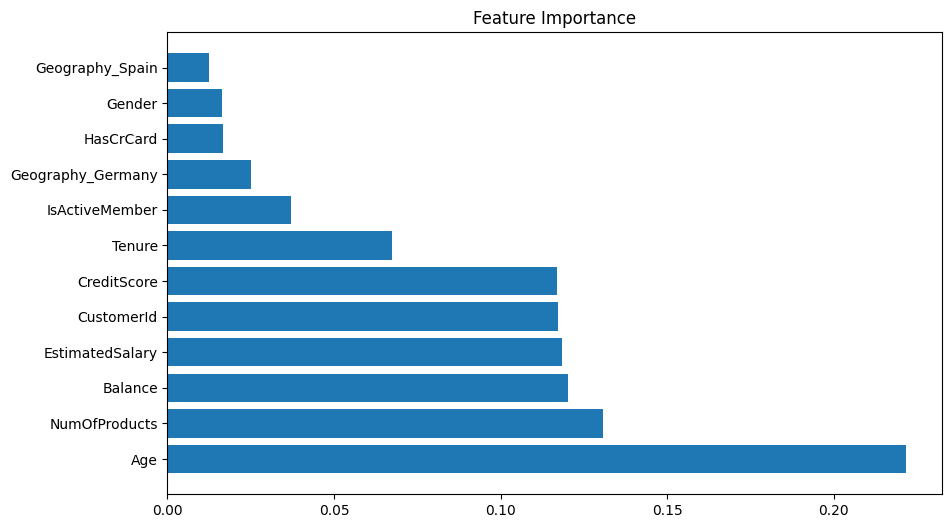

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [features[i] for i in indices]

plt.figure(figsize=(10,6))
plt.title('Feature Importance')
plt.barh(range(X.shape[1]), importances[indices] )
plt.yticks(range(X.shape[1]),names)
plt.show

### XAI

In [ ]:
import shap
import matplotlib.pyplot as plt

# load JS visualization code to notebook
shap.initjs()

# Create the explainer
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_test)

KeyboardInterrupt: 

In [ ]:
shap_values

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logR = LogisticRegression(random_state=42)
logR.fit(X_train,y_train)

y_pred_log = logR.predict(X_test)

In [ ]:
con_matrix = confusion_matrix(y_test,y_pred_log)
class_report = classification_report(y_test,y_pred_log)
accuracy = accuracy_score(y_test,y_pred_log)

In [ ]:
print(con_matrix,class_report,accuracy)

[[1543   64]
 [ 315   78]]               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000
 0.8105


## SVM

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear',random_state=42)
svm_model.fit(X_train,y_train)

y_pred_svm = svm_model.predict(X_test)



In [ ]:
con_matrix = confusion_matrix(y_test,y_pred_svm)
class_report = classification_report(y_test,y_pred_svm)
accuracy = accuracy_score(y_test,y_pred_svm)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print(con_matrix,class_report,accuracy)

[[1607    0]
 [ 393    0]]               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000
 0.8035


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

y_pred_knn = knn_model.predict(X_test)

In [ ]:
con_matrix = confusion_matrix(y_test,y_pred_knn)
class_report = classification_report(y_test,y_pred_knn)
accuracy = accuracy_score(y_test,y_pred_knn)

In [ ]:
print(con_matrix,class_report,accuracy)

[[1517   90]
 [ 252  141]]               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1607
           1       0.61      0.36      0.45       393

    accuracy                           0.83      2000
   macro avg       0.73      0.65      0.68      2000
weighted avg       0.81      0.83      0.81      2000
 0.829


## GBM

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GBM= GradientBoostingClassifier(n_estimators=100,random_state=42)
GBM.fit(X_train,y_train)

y_pred_gbm = GBM.predict(X_test)

In [ ]:
con_matrix = confusion_matrix(y_test,y_pred_knn)
class_report = classification_report(y_test,y_pred_knn)
accuracy = accuracy_score(y_test,y_pred_knn)

In [ ]:
print(con_matrix,class_report,accuracy)

[[1517   90]
 [ 252  141]]               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1607
           1       0.61      0.36      0.45       393

    accuracy                           0.83      2000
   macro avg       0.73      0.65      0.68      2000
weighted avg       0.81      0.83      0.81      2000
 0.829


## XGBoost

In [ ]:
import pandas as pd

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

# Step 4: Define XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Step 5: Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Step 6: GridSearchCV
grid = GridSearchCV(estimator=xgb,
                    param_grid=param_grid,
                    scoring='roc_auc',
                    cv=5,
                    verbose=1,
                    n_jobs=-1)

grid.fit(X_train, y_train)

# Step 7: Evaluation
print("✅ Best Parameters:", grid.best_params_)

y_pred = grid.predict(X_test)
print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:02:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
🎯 Accuracy: 0.8635

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      1607
           1       0.81      0.40      0.54       393

    accuracy                           0.86      2000
   macro avg       0.84      0.69      0.73      2000
weighted avg       0.86      0.86      0.84      2000



### feature Importance

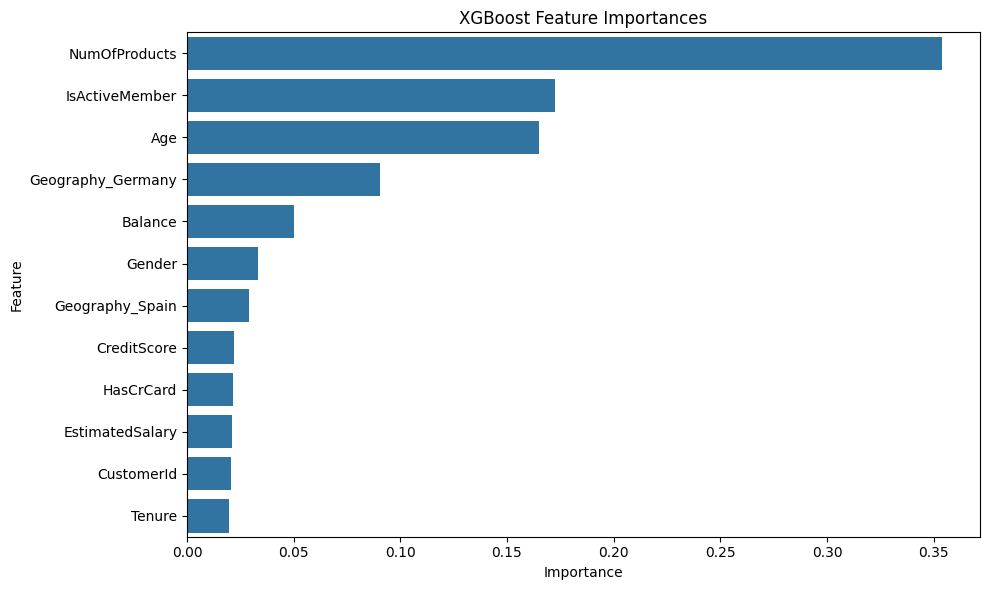

In [ ]:

# Get best model from GridSearch
best_model = grid.best_estimator_

# Get importance values
importances = best_model.feature_importances_
feature_names = X.columns

# Plot
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title("XGBoost Feature Importances")
plt.tight_layout()
plt.show()


## catboost

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.6 MB/s eta 0:00:00


In [ ]:
import catboost
from catboost import CatBoostClassifier

cbg = CatBoostClassifier(verbose=0)

# Step 5: GridSearchCV
param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1],
    'iterations': [100, 200],
    'l2_leaf_reg': [1, 3, 5]
}

grid = GridSearchCV(cbg, param_grid, scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

# Step 6: Evaluate
print("✅ Best Parameters:", grid.best_params_)
y_pred = grid.predict(X_test)
print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
✅ Best Parameters: {'depth': 6, 'iterations': 100, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
🎯 Accuracy: 0.8675

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



### feature Importance

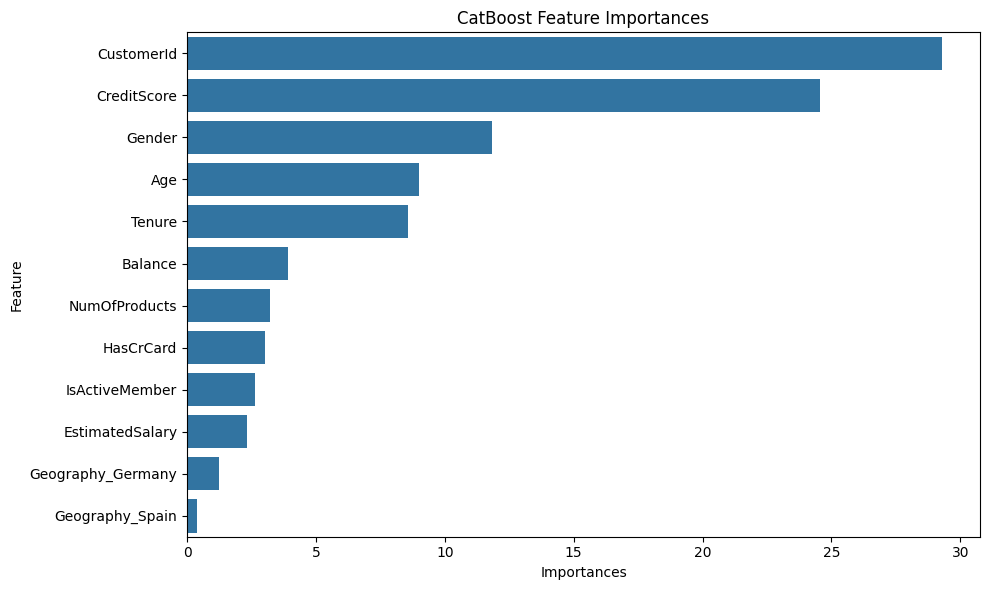

In [ ]:
# Step 7: Feature Importance
best_cbg = grid.best_estimator_
feat_imp = best_cbg.get_feature_importance(prettified=True)
feat_imp['Feature'] = X.columns

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp.sort_values(by='Importances', ascending=False),
            x='Importances', y='Feature')
plt.title("CatBoost Feature Importances")
plt.tight_layout()
plt.show()

## Light Boost

In [ ]:
!pip install lightgbm

In [ ]:
import lightgbm as lgb

# Step 4: Define LightGBM classifier
lgb_model = lgb.LGBMClassifier()

# Step 5: Define parameter grid for tuning
param_grid = {
    'num_leaves': [31, 50],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0]
}

grid = GridSearchCV(estimator=lgb_model,
                    param_grid=param_grid,
                    scoring='roc_auc',
                    cv=5,
                    verbose=1,
                    n_jobs=-1)

grid.fit(X_train, y_train)

# Step 6: Evaluate
print("✅ Best Parameters:", grid.best_params_)
y_pred = grid.predict(X_test)
print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[LightGBM] [Info] Number of positive: 1644, number of negative: 6356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1118
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205500 -> initscore=-1.352267
[LightGBM] [Info] Start training from score -1.352267
✅ Best Parameters: {'learning_rate': 0.01, 'max_depth': -1, 'n_estimators': 200, 'num_leaves': 31, 'subsample': 0.8}
🎯 Accuracy: 0.867

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.78      0.45      0.57       393

    accuracy                           0.87      2000
   

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


### feature Importance

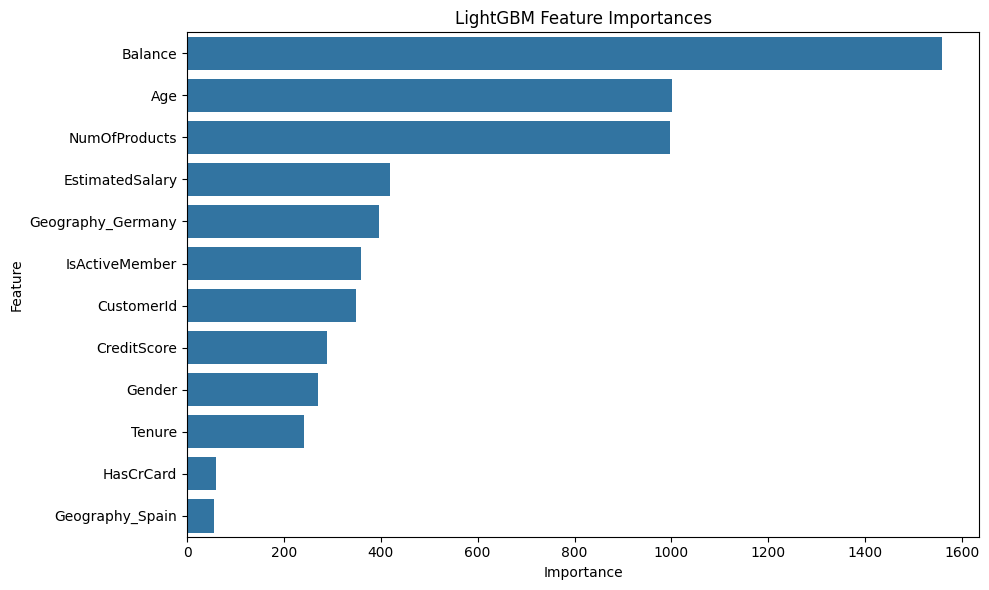

In [ ]:
# Step 7: Feature importance
best_model = grid.best_estimator_
feat_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp, x='Importance', y='Feature')
plt.title("LightGBM Feature Importances")
plt.tight_layout()
plt.show()


# Survival Analysis

## Cox Proportional Hazards Model


In [ ]:
pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 8.9 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=4966462fe9fd61560b39a34147855d188668422dad91ecff1744cfad9812460c
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


In [ ]:
from lifelines import CoxPHFitter

# Example: 'duration' = number of days active, 'churn' = 1 if churned, 0 if active
duration_col = "Tenure"     # time until churn (or censor)
event_col = "Exited"         # 1 = churned, 0 = not churned (censored)

Y_df = pd.DataFrame(y_train, columns=[event_col])
X_df = pd.DataFrame(X_train, columns=features)
X_df = X_df.reset_index(drop=True)
Y_df = Y_df.reset_index(drop=True)

df2 = pd.concat([X_df,Y_df],axis=1)
# Train Cox model
cph = CoxPHFitter()
cph.fit(df2, duration_col=duration_col, event_col=event_col)

# Summary of coefficients
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 8000 total observations, 6356 right-censored observations>
             duration col = 'Tenure'
                event col = 'Exited'
      baseline estimation = breslow
   number of observations = 8000
number of events observed = 1644
   partial log-likelihood = -12929.84
         time fit was run = 2025-07-29 16:09:32 UTC

---
                   coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                          
CustomerId        -0.02      0.98      0.02           -0.07            0.02                0.93                1.02
CreditScore       -0.04      0.96      0.02           -0.09            0.01                0.91                1.01
Gender            -0.19      0.83      0.02           -0.24           -0.14                0.79                0.87
Age                0.51      1.66      0.02            0.47            0.55                1.59                1.73
Balance            0.12      1.12      0.03            0.06            0.18                1.06                1.19
NumOfProducts     -0.05      0.95      0.02           -0.10           -0.00                0.91                1.00
HasCrCard         -0.01      0.99      0.02           -0.06            0.04                0.94                1.04
IsActiveMember    -0.37      0.69      0.03           -0.42           -0.32                0.65                0.73
EstimatedSalary   -0.01      0.99      0.02           -0.06            0.04                0.94                1.04
Geography_Germany  0.22      1.25      0.03            0.17            0.27                1.18                1.31
Geography_Spain    0.04      1.04      0.03           -0.02            0.10                0.98                1.10

                   cmp to      z      p  -log2(p)
covariate                                        
CustomerId           0.00  -0.97   0.33      1.60
CreditScore          0.00  -1.72   0.08      3.56
Gender               0.00  -7.66 <0.005     45.66
Age                  0.00  23.96 <0.005    419.14
Balance              0.00   3.85 <0.005     13.07
NumOfProducts        0.00  -2.00   0.05      4.47
HasCrCard            0.00  -0.43   0.66      0.59
IsActiveMember       0.00 -13.99 <0.005    145.27
EstimatedSalary      0.00  -0.44   0.66      0.60
Geography_Germany    0.00   8.39 <0.005     54.19
Geography_Spain      0.00   1.42   0.16      2.67
---
Concordance = 0.72
Partial AIC = 25881.69
log-likelihood ratio test = 927.80 on 11 df
-log2(p) of ll-ratio test = 635.10

In [ ]:
# Predict survival function for a sample customer
Y_df = pd.DataFrame(y_test, columns=[event_col])
X_df = pd.DataFrame(X_test, columns=features)
X_df = X_df.reset_index(drop=True)
Y_df = Y_df.reset_index(drop=True)

df2 = pd.concat([X_df,Y_df],axis=1)
sample = df2.iloc[]
cph.predict_survival_function(sample).plot(title="Survival Function")


SyntaxError: invalid syntax (ipython-input-46-535896999.py, line 8)

In [ ]:
cph.predict_partial_hazard(df2.iloc[:20])

In [ ]:
print(df2.iloc[:20,-1])

In [ ]:
df2.head()

In [ ]:
surv_funcs = cph.predict_survival_function(df2.iloc[:5])


In [ ]:
import matplotlib.pyplot as plt

surv_funcs.plot()
plt.title("Survival Function for First 5 Customers")
plt.xlabel("Time")
plt.ylabel("Survival Probability (1 - churn risk)")
plt.grid(True)
plt.show()


## Random Survival Forest

In [ ]:
pip install scikit-survival

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.3/298.3 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.1/220.1 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.1 MB/s eta 0:00:00
  Attempting uninstall: osqp
    Found existing installation: osqp 1.0.4
    Uninstalling osqp-1.0.4:
      Successfully uninstalled osqp-1.0.4


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sksurv.ensemble import RandomSurvivalForest
from sksurv.metrics import concordance_index_censored
from sksurv.util import Surv

# --- Step 1: Preprocess
df = df.copy()

# Encode categorical columns
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])  # Female=0, Male=1
df['Geography'] = LabelEncoder().fit_transform(df['Geography'])  # France/Spain/Germany -> 0/1/2

# Simulate time column (since it's not available): use 'Tenure' as duration (years observed)
df['duration'] = df['Tenure']  # or: df['duration'] = np.random.randint(1, 10, len(df)) if you want synthetic

# Create structured survival object
data_x = df.drop(columns=['CustomerId', 'Surname', 'Exited', 'Tenure'])
data_y = Surv.from_dataframe("Exited", "duration",df)

# --- Step 2: Fit Random Survival Forest
rsf = RandomSurvivalForest(n_estimators=100, min_samples_split=10, min_samples_leaf=15, max_features="sqrt", n_jobs=-1, random_state=42)
rsf.fit(data_x, data_y)

# --- Step 3: Evaluate using concordance index
ci = rsf.score(data_x, data_y)
print(f"Concordance Index: {ci:.4f}")


KeyError: 'Geography'

# Uplifting Modelling

In [ ]:
pip install causalml

## T-learners

In [ ]:
import numpy as np
from causalml.inference.meta import BaseTClassifier
from xgboost import XGBClassifier

# Create simulated treatment column
df['treatment'] = np.random.randint(0, 2, size=len(df))

# Define features (excluding target and treatment)
X = df.drop(columns=['Exited', 'treatment','Surname'])

# Define outcome and treatment
y = df['Exited']
treatment = df['treatment']

# Initialize T-learner
learner = BaseTClassifier(learner=XGBClassifier())

# Fit model
learner.fit(X=X, treatment=treatment, y=y)


In [ ]:
uplift_scores = learner.predict(X)


In [ ]:
type(y)

In [ ]:
type(treatment)

In [ ]:
from causalml.metrics import plot_qini
import numpy as np

# Make sure y and treatment are 1D numpy arrays
y = np.array(y).ravel()
treatment = np.array(treatment).ravel()
uplift_scores = np.array(uplift_scores).ravel()

plot_qini(y, uplift_scores, treatment)


In [ ]:
from causalml.metrics import qini_score, auuc_score

qini = qini_score(y, uplift_scores, treatment)
auuc = auuc_score(y, uplift_scores, treatment)

print(f"Qini: {qini:.4f}")
print(f"AUUC: {auuc:.4f}")
